In [50]:
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [51]:
#read trajectories from folder bags

nop = 39
trajectories = []
progresses = []
steps = []
scalars = []
ind = []

for i in range(nop):
    #print(i)
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "bags/user_"+str(i)+"/0_poses.txt"
    step_path = "bags/user_"+str(i)+"/0_step.txt"
    progress_path = "bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))

34
34
34
34


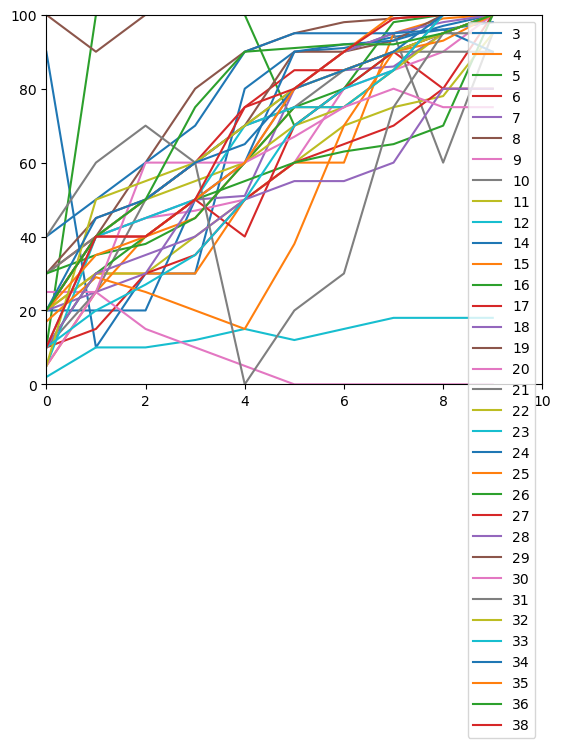

In [52]:
# plot progress
fig, ax = plt.subplots()
for i in range(len(progresses)):
    ax.plot(progresses[i], label=str(ind[i]))
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
plt.show()


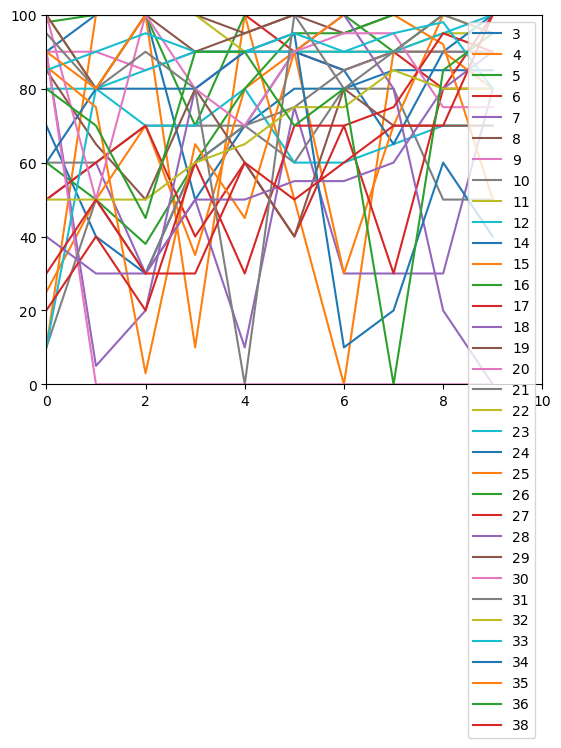

In [53]:
# plot scalar
fig, ax = plt.subplots()
for i in range(len(scalars)):
    ax.plot(scalars[i], label=str(ind[i]))
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
plt.show()

In [69]:
# calculate correlation between progress and scalar

correlation = []
correlation_delta = []

cnt = 0
for i in range(len(progresses)):
    delta_progress = np.diff(progresses[i], prepend=0)
    correlation.append(stats.pearsonr(progresses[i], scalars[i])[0])
    correlation_delta.append(stats.pearsonr(delta_progress, scalars[i])[0])

    print(correlation[i], correlation_delta[i], ind[i])
print(cnt)    


-0.07539697804716225 -0.17948243733867233 3
0.3263124748725924 0.2248396730773574 4
-0.1603140989867013 0.08281115538563324 5
-0.7130048722166069 0.7946204331184232 6
0.11403643068285022 0.5971230851228435 7
-0.1497972866686476 0.2781213496812406 8
0.22744593538819702 0.23858263929744505 9
0.2683818390364927 0.06959361843529174 10
-0.643376722530073 0.09874406319167053 11
-0.4530692022000925 0.5333371306920331 12
0.8245825185651541 0.20122117474722404 14
0.7161785972925521 0.3310423554409472 15
0.9350336908088063 -0.054702099710498386 16
0.4457493532601149 0.65 17
0.036417483695396324 0.7184972736575315 18
-0.2009206987494772 0.0702901946394417 19
0.5783517448238058 0.9316949906249121 20
0.9281738889351477 -0.6934060065887668 21
0.2270937237201126 -0.5306686305052323 22
0.8166304328183539 0.03980779429321307 23
-0.33551682864731047 0.39081944282254444 24
0.37357850495566575 0.735761825428898 25
nan nan 26
0.9485010043343515 0.09720288472879904 27
0.885500918639017 -0.19619472179398162 

/home/hang/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


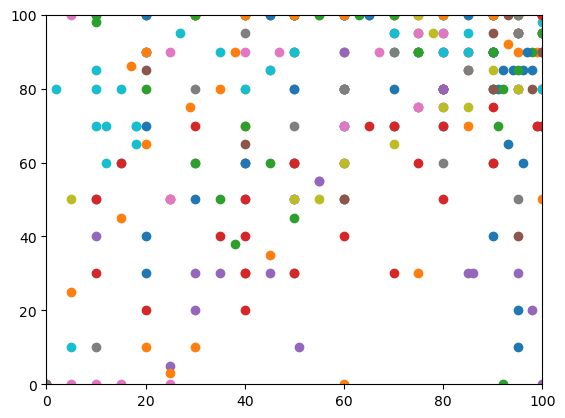

In [54]:
# plot progress and scalar using progress as x and scalar as y using dots
fig, ax = plt.subplots()
for i in range(len(scalars)):
    ax.scatter(progresses[i], scalars[i], label=str(ind[i]))
#ax.legend()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()


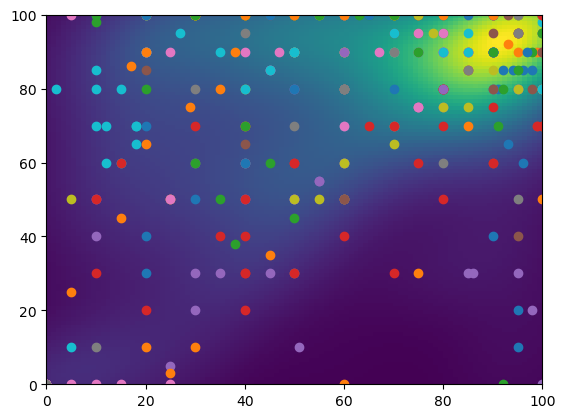

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

fig, ax = plt.subplots()

# Assuming 'progresses' and 'scalars' are lists of lists and 'ind' is a list of labels
all_progress = np.concatenate(progresses)
all_scalars = np.concatenate(scalars)

# Perform KDE on the combined data to get the density
xy = np.vstack([all_progress, all_scalars])
kde = gaussian_kde(xy)

# Create a grid over which to evaluate the KDE
xmin, xmax = 0, 100
ymin, ymax = 0, 100
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])

# Evaluate the KDE over the grid to get the density
zz = np.reshape(kde(grid_coords), xx.shape)

# Plot the gradient as a background
ax.imshow(np.rot90(zz), cmap='viridis', extent=[xmin, xmax, ymin, ymax], aspect='auto')

# Plot the individual points on top
for i in range(len(scalars)):
    ax.scatter(progresses[i], scalars[i], label=str(ind[i]))

# ax.legend() # Uncomment if you want to include a legend
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()
